## 👀 Scenario <a class="anchor" id="chapter1">
It's 1973 and as one of the top_ranked universites in the United States - Berkeley has attracted thousands of applicants to its graduate school , but how many made the cut.
    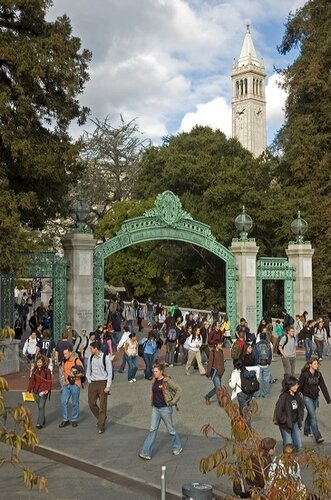

## ❓ About the project <a class="anchor" id="chapter2">
The objective of this project is to analyze how many students made the cut and got admitted to the university and thus analyze if there exists a bias in the Admission processes and if it exists , we will determine its statistical significance. We will use the R built-in dataset UCBAdmissions and start analyzing.

In [1]:
# loading the libraries
library(dplyr)
library(tidyverse)
library(ggplot2)
library(readr)
library(readxl)
library(stringr)
library(tidyr)
library(data.table)
library(broom)
library(scales)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ----------------------------------------------------------

## 1. Data Inspection

#### 1. Loading the dataset

In [2]:
# loading the UCBAdmissions dataset 
data(UCBAdmissions)
print(UCBAdmissions)

, , Dept = A

          Gender
Admit      Male Female
  Admitted  512     89
  Rejected  313     19

, , Dept = B

          Gender
Admit      Male Female
  Admitted  353     17
  Rejected  207      8

, , Dept = C

          Gender
Admit      Male Female
  Admitted  120    202
  Rejected  205    391

, , Dept = D

          Gender
Admit      Male Female
  Admitted  138    131
  Rejected  279    244

, , Dept = E

          Gender
Admit      Male Female
  Admitted   53     94
  Rejected  138    299

, , Dept = F

          Gender
Admit      Male Female
  Admitted   22     24
  Rejected  351    317



#### 2. Converting the dataset to a tidy format

In [3]:
# converting the dataset to a tidy format 
ucb_tidy <- tidy(UCBAdmissions)
head(ucb_tidy,2)

Warning message:
"'tidy.table' is deprecated.
Use 'tibble::as_tibble()' instead.
See help("Deprecated")"


Admit,Gender,Dept,n
Admitted,Male,A,512
Rejected,Male,A,313


  ## 2. Exploratory Data Analysis

#### 1. Acceptance rate for men and women.

In [4]:
# Acceptance rate for men and women 
ucb_tidy_aggregated <- ucb_tidy %>% 
group_by(Admit,Gender)  %>% 
summarize(n=sum(n)) %>% 
ungroup() %>%
group_by(Gender) %>%
mutate(prop=n/sum(n)) %>% 
filter(Admit == "Admitted")


`summarise()` has grouped output by 'Admit'. You can override using the `.groups` argument.



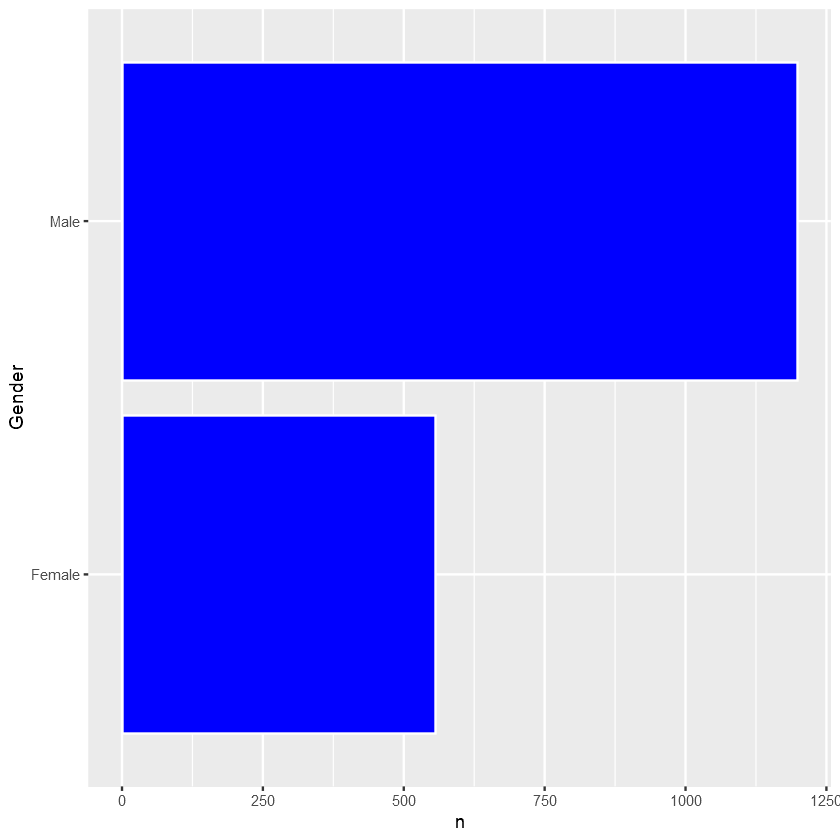

In [5]:
# visualizing the admitted by gender
ggplot(ucb_tidy_aggregated,aes(x=Gender,y=n)) + geom_col(color="white",fill="blue") + coord_flip()

From the previous plot , we can see that male applicants are preferred over women.

#### 2. Plotting Acceptance rate

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


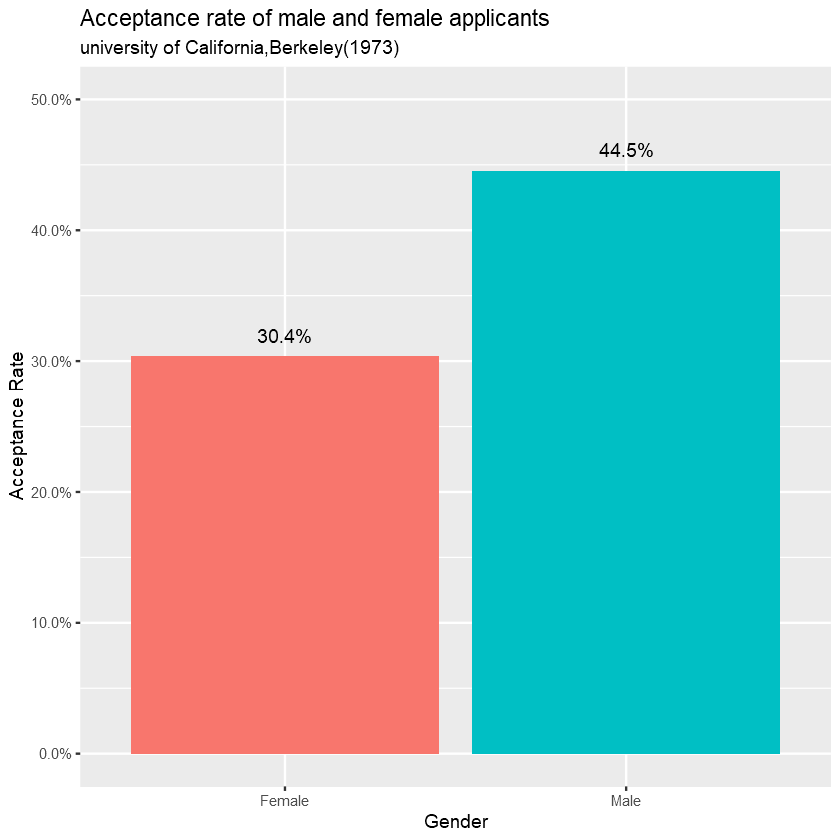

In [6]:
ggplot(ucb_tidy_aggregated,aes(x=Gender,y=prop,fill=Gender)) + 
geom_col() + 
geom_text(aes(label=percent(prop)),vjust=-1) + 
labs(title="Acceptance rate of male and female applicants",
     subtitle = "university of California,Berkeley(1973)",
     y="Acceptance Rate") + 
scale_y_continuous(labels=percent,limits=c(0,0.5)) + 
guides(fill=FALSE)

##### The acceptance rate of male applicants is 44.5% as opposed to 30.4% for female applicants.Now , the problem is starting to be clear, did Berkeley's graduate admissions department really discriminate against women?

let's split the analysis by department , so that we can get an idea about how acceptance rates differ by department , as well as by gender.

#### 3. Admissions by department

In [7]:
# Total Admitted and Rejected by department 
admission_by_department <- ucb_tidy %>% 
group_by(Dept,Admit) %>% 
summarize(n=sum(n))

`summarise()` has grouped output by 'Dept'. You can override using the `.groups` argument.



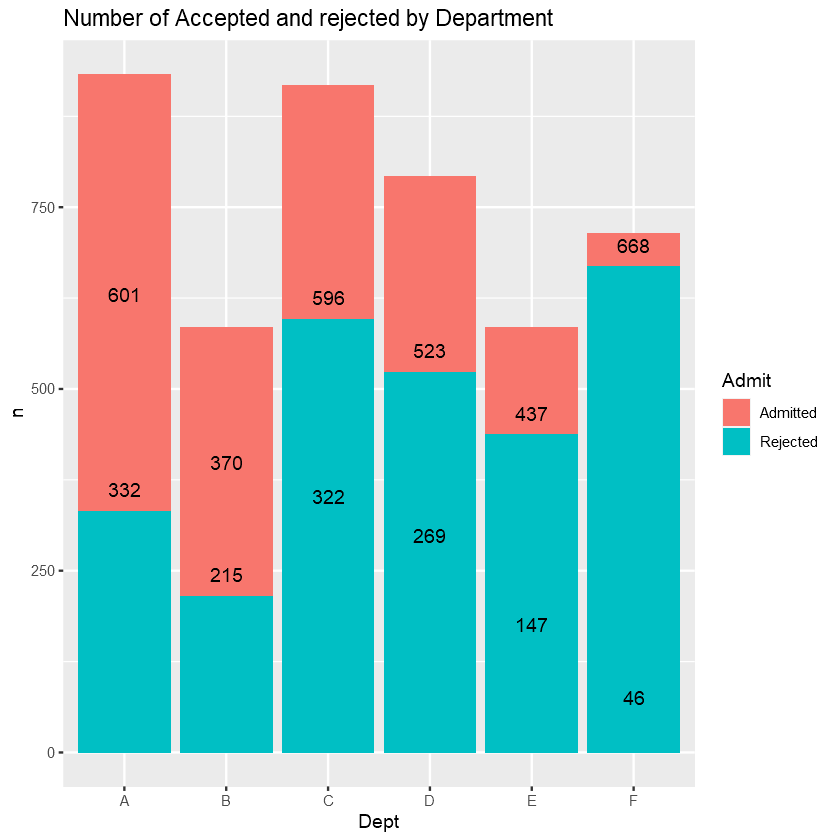

In [8]:
ggplot(admission_by_department,aes(x=Dept,y=n,fill=Admit)) + 
geom_col() + 
geom_text(aes(label=n,vjust=-1)) + 
labs(title="Number of Accepted and rejected by Department") 

#### 4. Acceptance rate by department

In [9]:
# Acceptance rate by department 
ucb_by_dept <- ucb_tidy %>% 
group_by(Gender,Dept) %>%
mutate(prop=n/sum(n)) %>% 
filter(Admit == "Admitted")
print(ucb_by_dept)

# A tibble: 12 x 5
# Groups:   Gender, Dept [12]
   Admit    Gender Dept      n   prop
   <chr>    <chr>  <chr> <dbl>  <dbl>
 1 Admitted Male   A       512 0.621 
 2 Admitted Female A        89 0.824 
 3 Admitted Male   B       353 0.630 
 4 Admitted Female B        17 0.68  
 5 Admitted Male   C       120 0.369 
 6 Admitted Female C       202 0.341 
 7 Admitted Male   D       138 0.331 
 8 Admitted Female D       131 0.349 
 9 Admitted Male   E        53 0.277 
10 Admitted Female E        94 0.239 
11 Admitted Male   F        22 0.0590
12 Admitted Female F        24 0.0704


#### 5. Plotting Acceptance rate by department

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


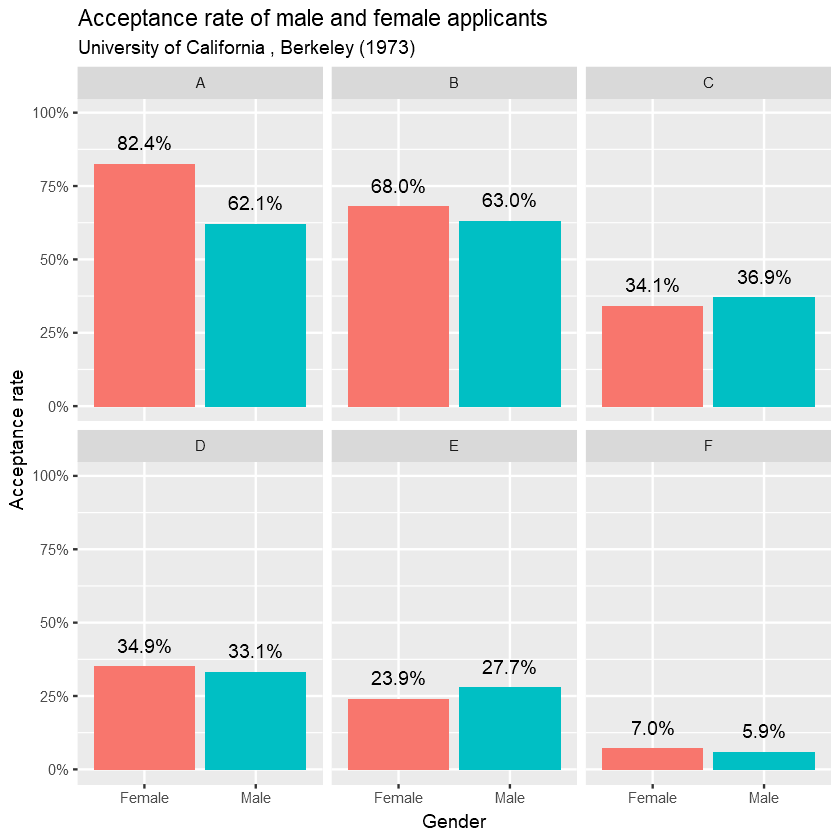

In [10]:
# plotting acceptance rate by department 
ggplot(ucb_by_dept,aes(x=Gender,y=prop,fill=Gender)) + 
geom_col() + 
geom_text(aes(label=percent(prop)),vjust=-1) + 
labs(title="Acceptance rate of male and female applicants",
     subtitle="University of California , Berkeley (1973)",
     y = "Acceptance rate") + 
scale_y_continuous(labels=scales::percent,limits=c(0,1)) + 
facet_wrap(~Dept) +
guides(fill=FALSE)

##### After splitting our analysis by department , the interpretation has changed.
* Men are more likely to be admitted into Departments C and E. 
* Despite the fact that A and B are easy to get into as we can see from the plot , few women applied to these departments. Only 108 women applied to department A as to 825 men!
* Therefore , we can hypothesise the fact that the effect of gender on acceptance is null when we control for department. This hypothesis can be tested using the logistic regression.

In [11]:
# function that repeats each row in each column n times 
multiple_rows <- function(column,n){
    rep(column,n)
}

# Applying the function to each column in the dataset , so that we get the full dataset 

ucb_full <- data.frame(Admit = multiple_rows(ucb_tidy$Admit,ucb_tidy$n),
                      Gender = multiple_rows(ucb_tidy$Gender,ucb_tidy$n), 
                      Dept = multiple_rows(ucb_tidy$Dept,ucb_tidy$n))


## 3. Gender Bias : Logistic regression.

In [ ]:
# Creating a logistic regression model and applying it to the full dataset using only the gender variable. 
# we will use the glm function to fit a generalised linear model , setting the family = binominal , because the outcome variabe is 
# Binary : Admitted or rejected. 
# The variable Admit is coded such as Admitted is level 1 and rejected is level 2 , but since glm will assume that level 2 represents 
# A success , we will reverse the coding of the variable Admit , so that we are predicting the probability of Admittance rather than rejection


In [16]:
library(forcats)
ucb_full$Admit <- factor(ucb_full$Admit,levels=c("Rejected","Admitted"))

In [19]:
# Running the regression 
glm_gender <- glm(Admit ~ Gender , data = ucb_full,family = "binomial" )
summary(glm_gender)


Call:
glm(formula = Admit ~ Gender, family = "binomial", data = ucb_full)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0855  -1.0855  -0.8506   1.2722   1.5442  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.83049    0.05077 -16.357   <2e-16 ***
GenderMale   0.61035    0.06389   9.553   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6044.3  on 4525  degrees of freedom
Residual deviance: 5950.9  on 4524  degrees of freedom
AIC: 5954.9

Number of Fisher Scoring iterations: 4


##### we can see that when we predict the probability of getting admitted as a function of gender alone , the effect is statistically significant , since the p-value is lower than 0.01. that is you are exp(0.61035) = 1.84 times more likely to be admitted if you are a man. let's control for department to see how this result differs.

In [20]:
glm_genderdept <- glm(Admit ~ Gender + Dept , data = ucb_full , family = "binomial")
summary(glm_genderdept)


Call:
glm(formula = Admit ~ Gender + Dept, family = "binomial", data = ucb_full)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4773  -0.9306  -0.3741   0.9588   2.3613  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.68192    0.09911   6.880 5.97e-12 ***
GenderMale  -0.09987    0.08085  -1.235    0.217    
DeptB       -0.04340    0.10984  -0.395    0.693    
DeptC       -1.26260    0.10663 -11.841  < 2e-16 ***
DeptD       -1.29461    0.10582 -12.234  < 2e-16 ***
DeptE       -1.73931    0.12611 -13.792  < 2e-16 ***
DeptF       -3.30648    0.16998 -19.452  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6044.3  on 4525  degrees of freedom
Residual deviance: 5187.5  on 4519  degrees of freedom
AIC: 5201.5

Number of Fisher Scoring iterations: 5


##### Controlling for the department , we can see that the gender is no longer statistically significant. The effect of gender disappears. In fact , it reverses suggesting that controlling for department , you were actually more likely to be admitted as a woman but this effect is not statistically significant. This is what is called the simpson's paradox.Therefore we can conclude that there was not a campus-wide bias against applicants of either gender in 1973.


In [24]:
# Individual departments handle their own admissions processes , so its plausible that bias exists in one department but not another.
# let's look at department A where 82.4% women were admitted but only 62.1 % of men. is the difference statistically significant?

setDT(ucb_full)
dept_a <- ucb_full[Dept == "A",]

glm_gender_depta <- glm(Admit ~ Gender, data = dept_a,family = "binomial")
summary(glm_gender_depta)


Call:
glm(formula = Admit ~ Gender, family = "binomial", data = dept_a)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8642  -1.3922   0.9768   0.9768   0.9768  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5442     0.2527   6.110 9.94e-10 ***
GenderMale   -1.0521     0.2627  -4.005 6.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1214.7  on 932  degrees of freedom
Residual deviance: 1195.7  on 931  degrees of freedom
AIC: 1199.7

Number of Fisher Scoring iterations: 4


#### if the department is A , there is a statistically significant bias in favour of women. However this does not mean that the department discriminated against men , the bias might exist simply because the female applicants were better qualified that year. Discrimination is defined by Bickel , Hammel & O'Connell (1975) as "the exercise of decision influenced by the sex of the applicant when that is immaterial to the qualifications of entry. Since we do not have any data on the qualifications of the candidates , we cannot say whether any gender bias in their admissions process amounted to discrimination.
##### When bias does exit , it is always worth considering whether there are any other factors that could explain the discrepancy.